In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import importlib

image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
data_path = "data/mnist/"
train_data = np.loadtxt(data_path + "mnist_train.csv", 
                        delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", 
                       delimiter=",") 
test_data[:10]

array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [186]:
import uommodule
import convo
import knn
importlib.reload(uommodule)
importlib.reload(convo)
importlib.reload(knn)
from uommodule import UOM
from convo import convolution,pooling,LGN
from knn import CKNN

In [58]:
M = UOM(train_data[:1000,1:],0.5)
M.mxinit(40)
G = M.loop_train(train_data[1000:10000,1:],20,re_elect=True,r_mode='rate',treshold=0.1)

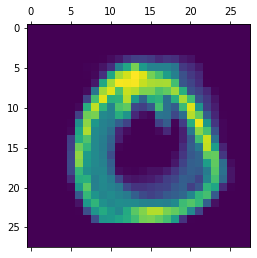

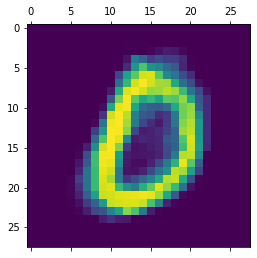

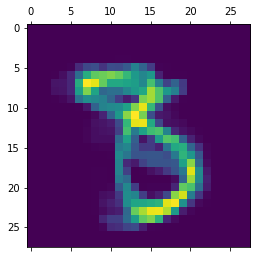

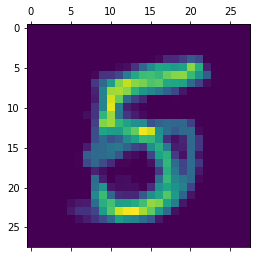

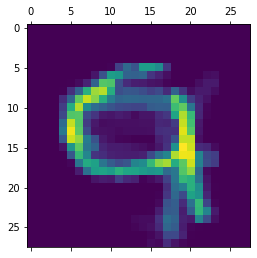

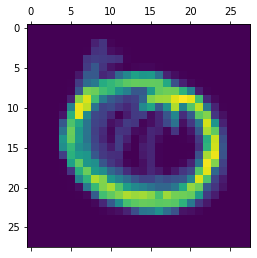

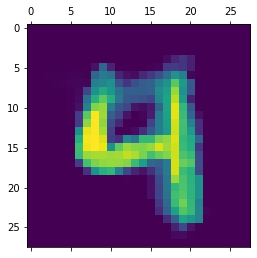

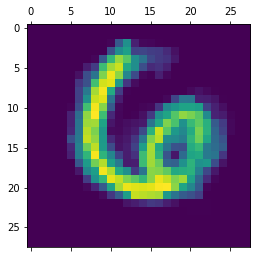

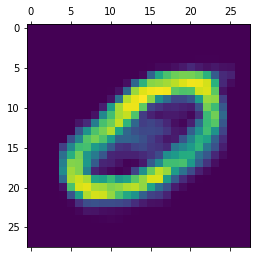

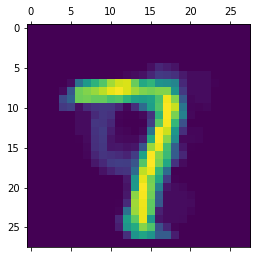

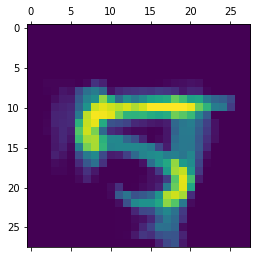

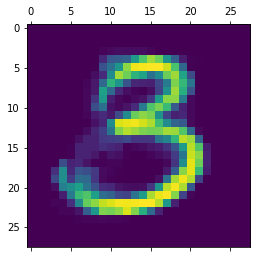

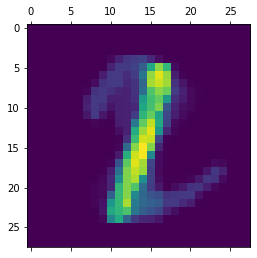

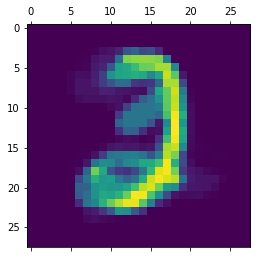

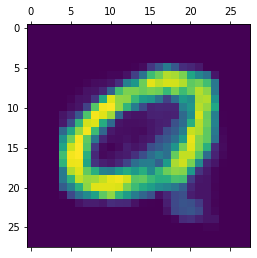

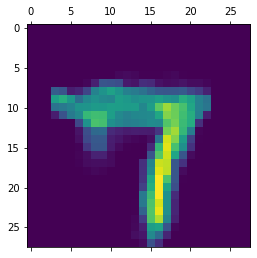

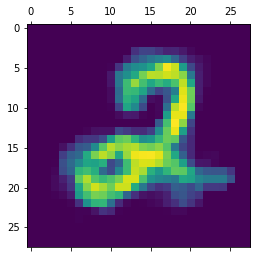

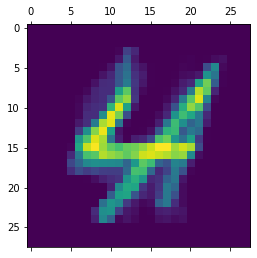

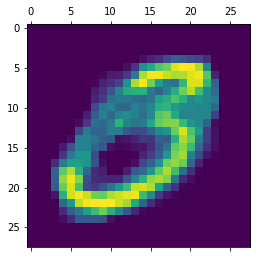

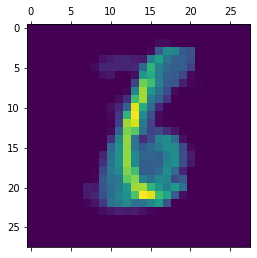

In [39]:
for i in range(20):
    plt.matshow(np.reshape(G[i],(28,28)))

In [67]:
A = CKNN(UOM,10)
#B = A.label_sp(train_data[:5000])
C = A.label_UOM(100,train_data[:5000],0.1)
D,E = A.united_UOM()
#F = A.g_bmu(train_data[:300,1:])
#G = A.d_list(train_data[:300])
#H = A.renew_add(train_data[:300])
#J = A.renew_del(0.2)
G = A.loop_renew(train_data[:5000],10,mode='odd')
#G = A.odd_train(train_data[:5000])

77
76
87
68
74
73
80
89
76
88


In [111]:
dlen = 400
csize2 = [28,28]
conv_ra2 = 2
conv_stride2 = 1
nnode2 = 40
pooling_dia2 = 4
pooling_stride2 = 4

csize3 = [7,7]
conv_ra3 = 1
conv_stride3 = 1
nnode3 = 80
pooling_dia3 = 3
pooling_stride3 = 2

in_data2 = train_data[:dlen,1:]

print('1st layer:',len(in_data2),'samples ×',np.shape(in_data2)[1],'pixels')

C2=convolution(csize2,conv_ra2,conv_stride2)
tr_data2 = C2.wt_tiles(in_data2,tres=800)
print('    convolution diameter =',C2.diameter,', stride =',C2.stride,', padding =',C2.padding,', channel =',C2.channel)
print('       ',np.shape(tr_data2)[0],'tiles ×',np.shape(tr_data2)[1],'pixels: for training')

M2=UOM(nnode2,0.1)
M2.mxinit(tr_data2[:1000])
M2.loop_train(tr_data2[1001:],10,r_mode='treshold',treshold=0.3)
print('        train UOM: ',nnode2,'×',C2.diameter**2,'matrix')

out_d2=C2.to_forward(in_data2,M2)
print('    forward bmu:',np.shape(out_d2)[0],'samples ×',np.shape(out_d2)[1],'pixels ×',np.shape(out_d2)[2],'channels')

P2 = pooling(csize2,pooling_dia2,pooling_stride2)
p_out_d2=P2.to_pooling(out_d2)
print('    pooling: diameter =',pooling_dia2,', stride =',pooling_stride2)
print(' ')
print('2nd layer form 1st layer:',np.shape(p_out_d2)[0],'samples ×',np.shape(p_out_d2)[1],'pixels ×',np.shape(p_out_d2)[2],'channels')

in_data3 = p_out_d2

C3=convolution(csize3,1,padding=False,channel=40)
tr_data3 = C3.wt_tiles(in_data3,tres=800)
print('    convolution diameter =',C3.diameter,', stride =',C3.stride,', padding =',C3.padding,', channel =',C3.channel)
print('       ',np.shape(tr_data3)[0],'tiles ×',np.shape(tr_data3)[1],'pixels: for training')

M3=UOM(nnode3,0.1)
M3.mxinit(tr_data3[:1000])
M3.loop_train(tr_data3[1001:],10,r_mode='treshold',treshold=0.3)
print('        train UOM: ',nnode3,'×',C3.diameter**2,'matrix')

out_d3=C3.to_forward(in_data3,M3)
print('    forward bmu:',np.shape(out_d3)[0],'samples ×',np.shape(out_d3)[1],'pixels ×',np.shape(out_d3)[2],'channels')

P3 = pooling([5,5],3,2)
p_out_d3=P3.to_pooling(out_d3)
print('    pooling: diameter =',pooling_dia3,', stride =',pooling_stride3)


1st layer: 400 samples × 784 pixels
    convolution diameter = 5 , stride = 1 , padding = True , channel = 1
        93889 tiles × 25 pixels: for training
        train UOM:  40 × 25 matrix
    forward bmu: 400 samples × 784 pixels × 40 channels
    pooling: diameter = 4 , stride = 4
 
2nd layer form 1st layer: 400 samples × 49 pixels × 40 channels
    convolution diameter = 3 , stride = 1 , padding = False , channel = 40
        9996 tiles × 360 pixels: for training
        train UOM:  80 × 9 matrix
    forward bmu: 400 samples × 25 pixels × 80 channels
    pooling: diameter = 3 , stride = 2


In [138]:
class layer(object):
    def __init__(self,csize,Conv,Uom,Pooling):
        self.csize = csize
        self.Conv = Conv
        self.Uom = Uom
        self.Pooling = Pooling
        
    def construct(self,indata,conv_tres=800,uom_loop=10,uom_mode='treshold',uom_treshold=0.3):
        print('1st layer:',len(indata),'samples ×',np.shape(indata)[1],'pixels')
        tr_data = self.Conv.wt_tiles(indata,conv_tres)
        print('    convolution diameter =',self.Conv.diameter,', stride =',self.Conv.stride,', padding =',self.Conv.padding,', channel =',self.Conv.channel)
        print('       ',np.shape(tr_data)[0],'tiles ×',np.shape(tr_data)[1],'pixels: for training')

        self.Uom.mxinit(tr_data[:1000])
        self.Uom.loop_train(tr_data[1001:],uom_loop,uom_mode,uom_treshold)
        print('        train UOM: ',self.Uom.nnodes,'×',self.Conv.diameter**2,'matrix')

        self.out_d = self.Conv.to_forward(indata,self.Uom)
        print('    forward bmu:',np.shape(self.out_d)[0],'samples ×',np.shape(self.out_d)[1],'pixels ×',np.shape(self.out_d)[2],'channels')

        self.p_out_d=self.Pooling.to_pooling(self.out_d)
        print('    pooling: diameter =',self.Pooling.diameter,', stride =',self.Pooling.stride)
        print(' ')
        print('2nd layer form 1st layer:',np.shape(self.p_out_d)[0],'samples ×',np.shape(self.p_out_d)[1],'pixels ×',np.shape(self.p_out_d)[2],'channels')
        return self.p_out_d
    
    def training(self,indata,uom_loop=10):
        #training and forward without layer construction
        tr_data = self.Conv.wt_tiles(indata)
        #print('    convolution diameter =',self.Conv.diameter,', stride =',self.Conv.stride,', padding =',self.Conv.padding,', channel =',self.Conv.channel)
        print('       ',np.shape(tr_data)[0],'tiles ×',np.shape(tr_data)[1],'pixels: for UOM training')

        self.Uom.loop_train(tr_data,uom_loop)
        print('        train UOM: ',self.Uom.nnodes,'×',self.Conv.diameter**2,'matrix')

        self.out_d = self.Conv.to_forward(indata,self.Uom)
        print('    forward bmu:',np.shape(self.out_d)[0],'samples ×',np.shape(self.out_d)[1],'pixels ×',np.shape(self.out_d)[2],'channels')

        self.p_out_d=self.Pooling.to_pooling(self.out_d)
        print('    pooling: diameter =',self.Pooling.diameter,', stride =',self.Pooling.stride)
        print(' ')
        print('2nd layer form 1st layer:',np.shape(self.p_out_d)[0],'samples ×',np.shape(self.p_out_d)[1],'pixels ×',np.shape(self.p_out_d)[2],'channels')
        return self.p_out_d
    
    def forward(self,indata):
        #forward without training
        self.out_d = self.Conv.to_forward(indata,self.Uom)
        self.p_out_d=self.Pooling.to_pooling(self.out_d)
        return self.p_out_d


In [175]:
dlen = 4000
csize2 = [28,28]
conv_ra2 = 3
conv_stride2 = 1
nnode2 = 40
pooling_dia2 = 4
pooling_stride2 = 4

csize3 = [7,7]
conv_ra3 = 1
conv_stride3 = 1
nnode3 = 80
pooling_dia3 = 3
pooling_stride3 = 2

in_data2 = train_data[:dlen,1:]

C2=convolution(csize2,conv_ra2,conv_stride2)
M2=UOM(nnode2,0.1)
P2 = pooling(csize2,pooling_dia2,pooling_stride2)

C3=convolution(csize3,conv_ra3,conv_stride3,padding=False,channel=40)
M3=UOM(nnode3,0.2)
P3 = pooling(csize3,pooling_dia3,pooling_stride3)

AB = layer(csize2,C2,M2,P2)
BC = layer(csize3,C3,M3,P3)
in_data3 = AB.construct(in_data2)
G = BC.construct(in_data3)

1st layer: 4000 samples × 784 pixels
    convolution diameter = 7 , stride = 1 , padding = True , channel = 1
        1343733 tiles × 49 pixels: for training
        train UOM:  40 × 49 matrix
    forward bmu: 4000 samples × 784 pixels × 40 channels
    pooling: diameter = 4 , stride = 4
 
2nd layer form 1st layer: 4000 samples × 49 pixels × 40 channels
1st layer: 4000 samples × 49 pixels
    convolution diameter = 3 , stride = 1 , padding = False , channel = 40
        99995 tiles × 360 pixels: for training
        train UOM:  80 × 9 matrix
    forward bmu: 4000 samples × 25 pixels × 80 channels
    pooling: diameter = 3 , stride = 2
 
2nd layer form 1st layer: 4000 samples × 4 pixels × 80 channels


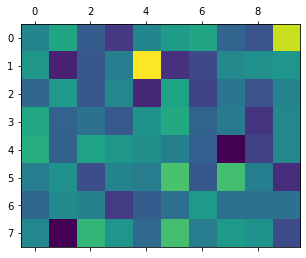

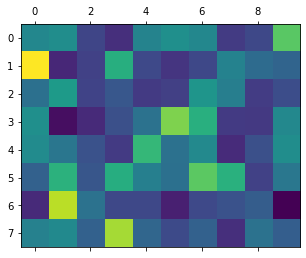

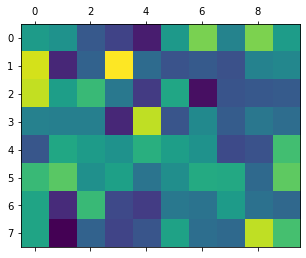

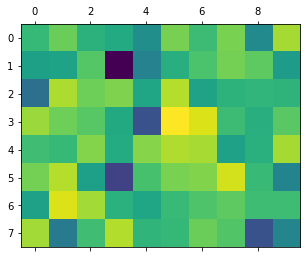

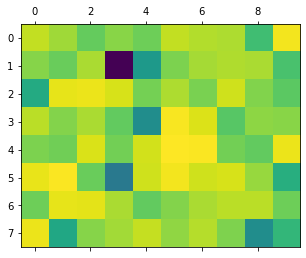

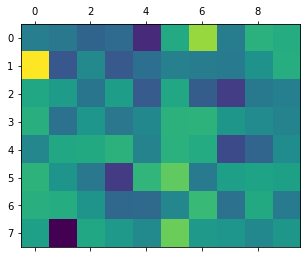

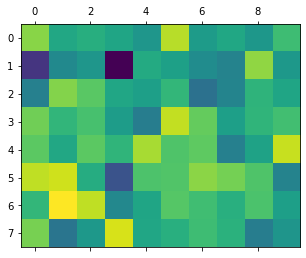

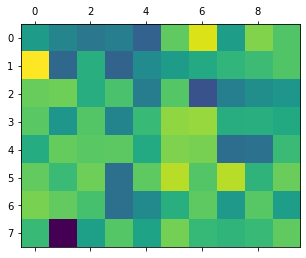

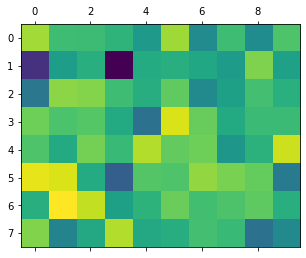

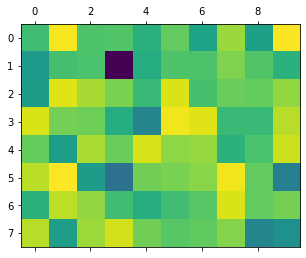

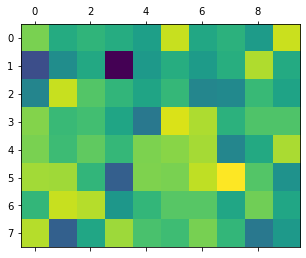

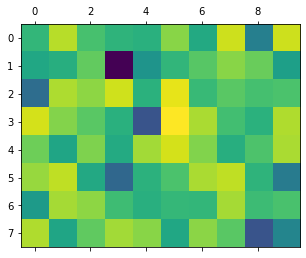

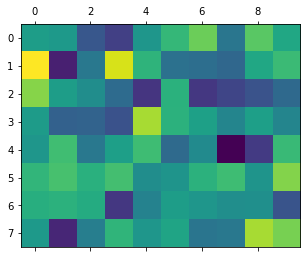

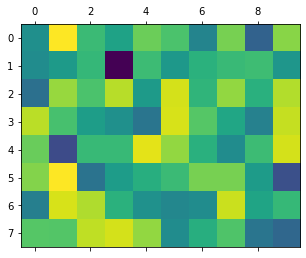

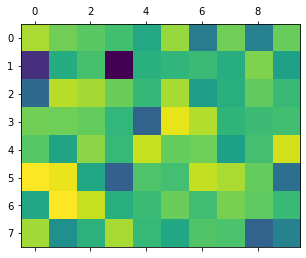

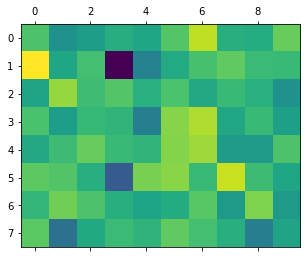

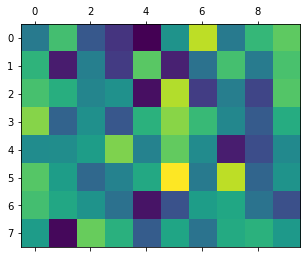

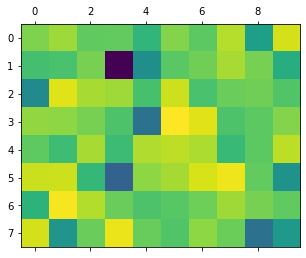

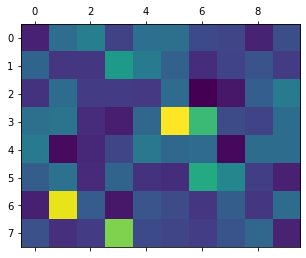

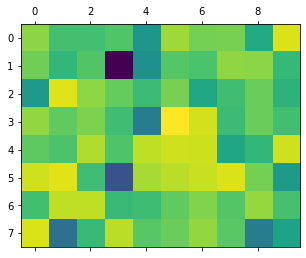

In [176]:
for i in range(20):
    plt.matshow(np.reshape(BC.p_out_d[:,3,:][i],(8,10)))

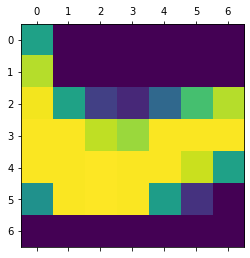

In [162]:
#print(np.shape(AB.out_d[:,:,5]))
plt.matshow(np.reshape(AB.Uom.matrix[5],(7,7)))

In [182]:
TD1 = np.reshape(BC.p_out_d,(4000,320))
TL1 = train_data[:4000,0]
TDL = np.insert(TD1,0,TL1,axis=1)

In [185]:
np.shape(TDL)

(4000, 321)

In [191]:
A = CKNN(UOM,10)
#B = A.label_sp(train_data[:5000])
C = A.label_UOM(100,TDL,0.1)
D,E = A.united_UOM()
#F = A.g_bmu(train_data[:300,1:])
#G = A.d_list(train_data[:300])
#H = A.renew_add(train_data[:300])
#J = A.renew_del(0.2)
G = A.loop_renew(TDL,10,mode='odd')
#G = A.odd_train(train_data[:5000])

264
296
310
325
298
303
309
314
324
303
